In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import xgboost
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df=pd.read_csv('Airbnb_Open_Data.csv')

C:\Users\ashfa\AppData\Local\Temp\ipykernel_21984\181192011.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Airbnb_Open_Data.csv')


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [28]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [29]:
df=df.drop(columns=["id", "NAME", "host name", "license", "house_rules", "last review","neighbourhood group","neighbourhood","room type","cancellation_policy","host_identity_verified","country",'country code','instant_bookable'])


In [30]:
df["price"] = (df["price"].astype(str).str.replace("$", "", regex=False).str.replace(",", "", regex=False))
df["price"] = pd.to_numeric(df["price"],errors='coerce')


In [31]:
df["service fee"] = (df["service fee"].astype(str).str.replace("$", "", regex=False).str.replace(",", "", regex=False))
df["service fee"] = pd.to_numeric(df["service fee"],errors='coerce')


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host id                         102599 non-null  int64  
 1   lat                             102591 non-null  float64
 2   long                            102591 non-null  float64
 3   Construction year               102385 non-null  float64
 4   price                           102352 non-null  float64
 5   service fee                     102326 non-null  float64
 6   minimum nights                  102190 non-null  float64
 7   number of reviews               102416 non-null  float64
 8   reviews per month               86720 non-null   float64
 9   review rate number              102273 non-null  float64
 10  calculated host listings count  102280 non-null  float64
 11  availability 365                102151 non-null  float64
dtypes: float64(11), 

In [33]:
df.corr()

,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
host id,1.000000,0.000661,-0.008999,0.004871,0.003837,0.003632,-0.002266,-0.004503,-0.001746,0.003459,0.001722,-0.002044
lat,0.000661,1.000000,0.074348,0.005697,-0.005900,-0.005889,0.014889,-0.025236,-0.019492,-0.003917,0.032468,-0.005011
long,-0.008999,0.074348,1.000000,0.000861,0.003269,0.003116,-0.039639,0.069169,0.118598,0.015283,-0.104154,0.058428
Construction year,0.004871,0.005697,0.000861,1.000000,-0.003753,-0.003430,-0.000486,0.001990,0.004092,0.004753,-0.002745,-0.008264
price,0.003837,-0.005900,0.003269,-0.003753,1.000000,0.999991,-0.003471,0.005229,0.004186,-0.004576,-0.000106,-0.002833
service fee,0.003632,-0.005889,0.003116,-0.003430,0.999991,1.000000,-0.003652,0.005121,0.004091,-0.004389,0.000041,-0.003173
minimum nights,-0.002266,0.014889,-0.039639,-0.000486,-0.003471,-0.003652,1.000000,-0.049997,-0.096141,-0.002167,0.084846,0.063541
number of reviews,-0.004503,-0.025236,0.069169,0.001990,0.005229,0.005121,-0.049997,1.000000,0.590939,-0.018412,-0.080907,0.099368
reviews per month,-0.001746,-0.019492,0.118598,0.004092,0.004186,0.004091,-0.096141,0.590939,1.000000,0.037526,-0.025621,0.077193
review rate number,0.003459,-0.003917,0.015283,0.004753,-0.004576,-0.004389,-0.002167,-0.018412,0.037526,1.000000,0.024273,-0.006217


<Axes: >

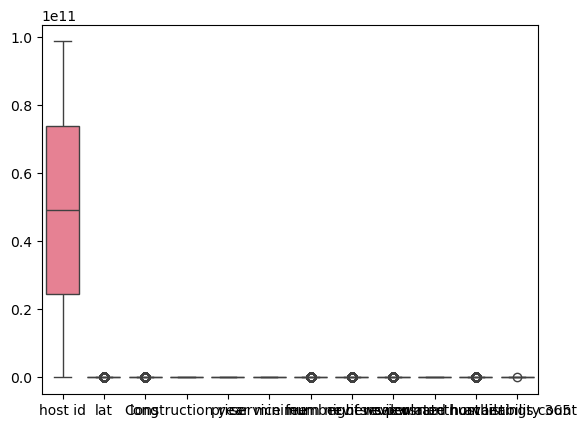

In [34]:
sns.boxplot(df)

In [35]:
cols = df.select_dtypes(include=["int64", "float64"]).columns
for col in cols:
    df[col].fillna(df[col].median(), inplace=True)


C:\Users\ashfa\AppData\Local\Temp\ipykernel_21984\2496642812.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [45]:
# Q1 = df["price"].quantile(0.25)
# Q3 = df["price"].quantile(0.75)
# IQR = Q3 - Q1
# df = df[(df["price"] >= Q1 - 1.5 * IQR) & (df["price"] <= Q3 + 1.5 * IQR)]


In [46]:
x = df.drop("price", axis=1)
y = df["price"]

In [47]:

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8, random_state=42)


In [48]:

scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)


In [49]:
model=LinearRegression()
model.fit(xtrain_scaled,ytrain)

LinearRegression()

In [50]:
from sklearn.metrics import r2_score, mean_squared_error
y_train_pred = model.predict(xtrain_scaled)
y_test_pred = model.predict(xtest_scaled)


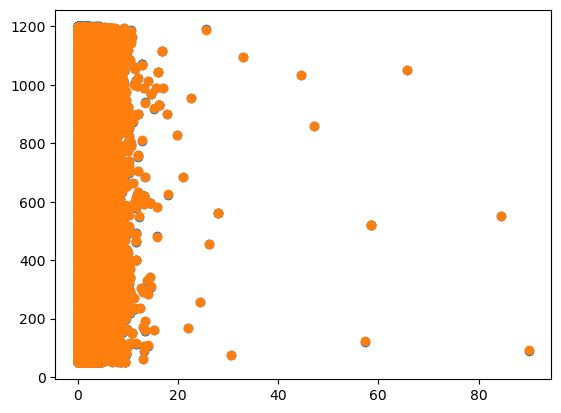

In [51]:
plt.scatter(xtrain['reviews per month'],ytrain)
plt.scatter(xtrain['reviews per month'],y_train_pred)

In [52]:
r2_score(ytrain,y_train_pred)

0.9957381197851634

In [53]:
r2_score(ytest,y_test_pred)

0.9954372898918471